In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [8]:
import dipolelosses
import potentials
import constants
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels

In [9]:
B_values = np.logspace(-3,1,50)

pot      = potentials.Silvera_Triplet
T        = 5e-4

GVsB_H=[]
GVsB_T=[]

for c in DipoleChannels:
    Gs=[]
    for B in B_values:
        Gs.append(dipolelosses.GetGFactor(c,  B, constants.HydrogenConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
    GVsB_H.append(np.array(Gs))
    Gs=[]

    for B in B_values:
        Gs.append(dipolelosses.GetGFactor(c,  B, constants.TritiumConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
    GVsB_T.append(np.array(Gs))


In [ ]:
# To make the plots with real B on x axis
#B_display=B_values

# To make the plots with Stoof scaled B on x axis
B_display=dipolelosses.B_Naught(B_values)

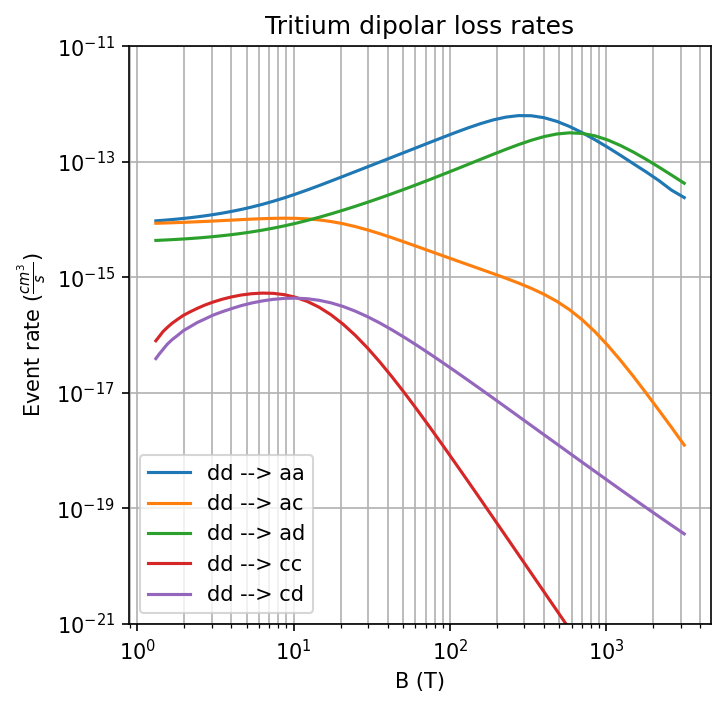

In [10]:
B_corrected = dipolelosses.B_Naught(B_values)
plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(DipoleChannels)):
    Label='dd --> '+str(DipoleChannels[ci]['alphaprime'])+str(DipoleChannels[ci]['betaprime'])
    plt.plot(B_display,GVsB_T[ci],label=Label)
    plt.semilogy()
plt.xlabel("B (T)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Tritium dipolar loss rates")
plt.grid(which='both')
plt.legend()
plt.loglog()
plt.show()

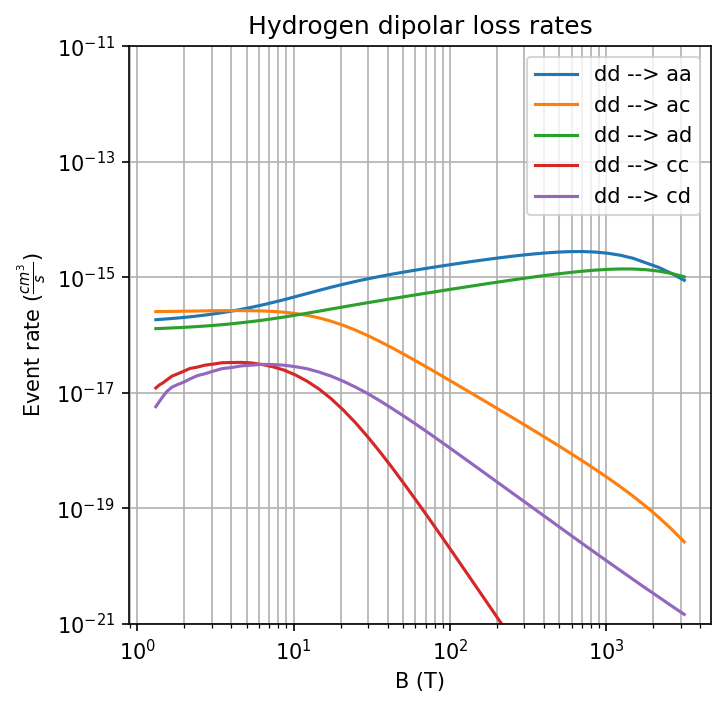

In [11]:


plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(DipoleChannels)):
    Label='dd --> '+str(DipoleChannels[ci]['alphaprime'])+str(DipoleChannels[ci]['betaprime'])
    plt.plot(B_display,GVsB_H[ci],label=Label)
    plt.semilogy()
plt.xlabel("B (T)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Hydrogen dipolar loss rates")
plt.grid(which='both')
plt.legend()
plt.loglog()
plt.show()

In [12]:
temps=np.logspace(-3,2,50)
pot      = potentials.Silvera_Triplet
T        = 5e-4
Channels = [ ['a','a'],
             ['a','c'],
             ['a','d'],
             ['c','c'],
             ['c','d']]

LossesT_02=[]
LossesT_24=[]
LossesT_20=[]
LossesT_22=[]

for c in Channels:
    LossesT_02.append(dipolelosses.GetGFactorVsT(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='T', B_value=1e-5,potential=pot,temps=temps,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
    LossesT_20.append(dipolelosses.GetGFactorVsT(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='T', B_value=1e-5,potential=pot,temps=temps,rhos=np.linspace(1e-9,0.75,2000),lin=2,lout=0))
    LossesT_24.append(dipolelosses.GetGFactorVsT(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='T', B_value=1e-5,potential=pot,temps=temps,rhos=np.linspace(1e-9,0.75,2000),lin=2,lout=4))
    LossesT_22.append(dipolelosses.GetGFactorVsT(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='T', B_value=1e-5,potential=pot,temps=temps,rhos=np.linspace(1e-9,0.75,2000),lin=2,lout=2))


AttributeError: module 'dipolelosses' has no attribute 'GetGFactorVsT'

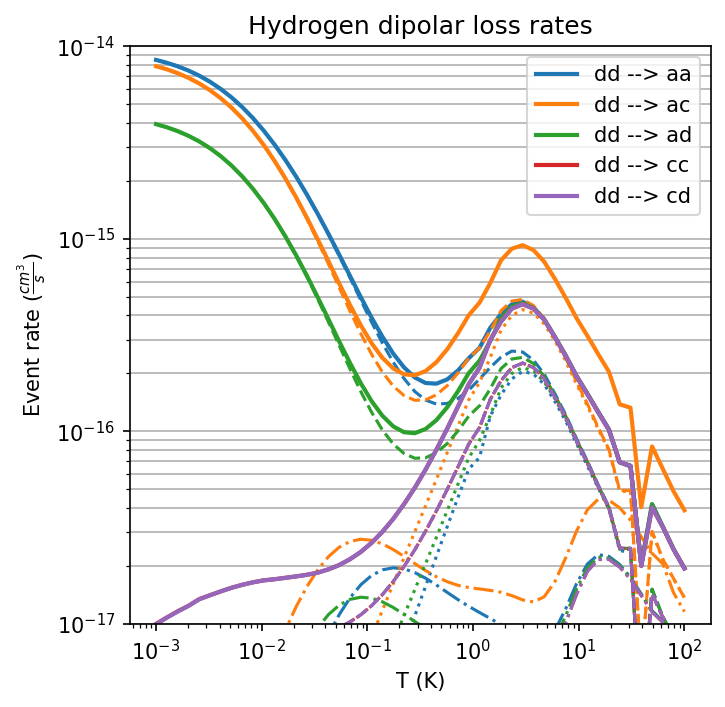

In [7]:
colors=plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(Channels)):
    Label='dd --> '+str(Channels[ci][0])+str(Channels[ci][1])
    plt.plot(temps,LossesT_02[ci],'--',color=colors[ci])
    plt.plot(temps,LossesT_20[ci],':',color=colors[ci])
    plt.plot(temps,LossesT_24[ci],'-.',color=colors[ci])

    plt.plot(temps,LossesT_02[ci]+LossesT_20[ci]+LossesT_24[ci],label=Label,color=colors[ci],linewidth=2)
    plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-17, 1e-14)
plt.title("Hydrogen dipolar loss rates")
plt.grid(axis='y',which='both')
plt.legend()
plt.loglog()
plt.show()

In [ ]:
LossesT_24=[]
LossesT_20=[]


for c in Channels:
    LossesT_02.append(dipolelosses.GetGFactorVsT(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='T', B_value=1e-5,potential=pot,temps=temps,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
    LossesT_20.append(dipolelosses.GetGFactorVsT(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='T', B_value=1e-5,potential=pot,temps=temps,rhos=np.linspace(1e-9,0.75,2000),lin=2,lout=0))
    LossesT_24.append(dipolelosses.GetGFactorVsT(alpha='d',beta='d',alphaprime=c[0],betaprime=c[1],which='T', B_value=1e-5,potential=pot,temps=temps,rhos=np.linspace(1e-9,0.75,2000),lin=2,lout=4))

In [8]:
dipolelosses.B_Naught

AttributeError: module 'dipolelosses' has no attribute 'B_Naught'